In [1]:
import pandas as pd

csv = pd.read_csv('results2.csv')
csv

,TimeSeries Dataset,Model,NoiseType,NoiseVol,Lr,hd_bites,MAE
0,SanFranciscoTraffic,RegHD,None,0.0,0.000010,1,0.146986
1,SanFranciscoTraffic,KalmanFilter,None,0.0,0.015000,1,0.161418
2,SanFranciscoTraffic,ARHD,None,0.0,0.100000,1,0.144250
3,SanFranciscoTraffic,ARHD,None,0.0,0.010000,1,0.142922
4,SanFranciscoTraffic,ARHD,None,0.0,0.001000,1,0.152187
...,...,...,...,...,...,...,...
535,SanFranciscoTraffic,KalmanHD,1,0.6,0.010000,4,0.140188
536,SanFranciscoTraffic,VAE,1,0.6,0.010000,4,0.167174
537,SanFranciscoTraffic,KalmanFilter,1,0.6,0.010000,4,0.161418
538,SanFranciscoTraffic,RegHD,1,0.6,0.000001,4,0.236923


In [2]:
original = csv[(csv['Model'] == 'ARHD') & (csv['NoiseType'] == 'None')]
print(len(original))
original

99


,TimeSeries Dataset,Model,NoiseType,NoiseVol,Lr,hd_bites,MAE
2,SanFranciscoTraffic,ARHD,None,0.0,0.10000,1,0.144250
3,SanFranciscoTraffic,ARHD,None,0.0,0.01000,1,0.142922
4,SanFranciscoTraffic,ARHD,None,0.0,0.00100,1,0.152187
5,SanFranciscoTraffic,ARHD,None,0.0,0.00010,1,0.433255
6,SanFranciscoTraffic,ARHD,None,0.0,0.00001,1,0.633318
...,...,...,...,...,...,...,...
104,ElectricityLoadDiagrams,ARHD,None,0.0,0.10000,8,194.617480
105,ElectricityLoadDiagrams,ARHD,None,0.0,0.01000,8,1.386295
106,ElectricityLoadDiagrams,ARHD,None,0.0,0.00100,8,0.210028
107,ElectricityLoadDiagrams,ARHD,None,0.0,0.00010,8,0.431465


In [3]:
datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

original_regHD = {}

for dataset in datasets:
    if dataset == "SanFranciscoTraffic":
        learning_rate=0.000001
        hd_representation=4
        dimension_hd=-2
    elif dataset == "MetroInterstateTrafficVolume":
        learning_rate=0.00001
        hd_representation=2
        dimension_hd=-4
    elif dataset == "GuangzhouTraffic":
        learning_rate=0.000001
        hd_representation=4
        dimension_hd=-4
    elif dataset == "EnergyConsumptionFraunhofer":
        learning_rate=0.000001
        hd_representation=4
        dimension_hd=-4
    elif dataset == "ElectricityLoadDiagrams":
        learning_rate=0.00001
        hd_representation=1
        dimension_hd=-3

    original = csv[(csv['Model'] == 'RegHD') & (csv['NoiseType'] == 'None') & (csv['Lr'] == learning_rate) & (csv['TimeSeries Dataset'] == dataset)]
    original_regHD[dataset] = original.iloc[dimension_hd]['MAE']
print(len(original_regHD))
original_regHD

5


{'SanFranciscoTraffic': 0.2370974244600198,
 'MetroInterstateTrafficVolume': 0.1555402489497904,
 'GuangzhouTraffic': 0.1856148422214156,
 'EnergyConsumptionFraunhofer': 0.2808919416929978,
 'ElectricityLoadDiagrams': 0.085257148141733}

In [4]:
original_KF = {}

original = csv[(csv['Model'] == 'KalmanFilter') & (csv['NoiseType'] == 'None')]

for i in range(len(original)):
    row = original.iloc[i]
    original_KF[row['TimeSeries Dataset']] = row['MAE']

In [4]:
print(original_regHD)
print(original_KF)

{'SanFranciscoTraffic': 0.2370974244600198, 'MetroInterstateTrafficVolume': 0.1555402489497904, 'GuangzhouTraffic': 0.1856148422214156, 'EnergyConsumptionFraunhofer': 0.2808919416929978, 'ElectricityLoadDiagrams': 0.085257148141733}
{'SanFranciscoTraffic': 0.161418219839664, 'MetroInterstateTrafficVolume': 0.082900643721638, 'GuangzhouTraffic': 0.1082922806285127, 'EnergyConsumptionFraunhofer': 0.117082020341099, 'ElectricityLoadDiagrams': 0.0650992433057082}


In [5]:
datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

original_ARHD = {}

for dataset in datasets:
    if dataset == "SanFranciscoTraffic":
        learning_rate=0.01
        hd_representation=4
    elif dataset == "MetroInterstateTrafficVolume":
        learning_rate=0.1
        hd_representation=2
    elif dataset == "GuangzhouTraffic":
        learning_rate=0.01
        hd_representation=4
    elif dataset == "EnergyConsumptionFraunhofer":
        learning_rate=0.01
        hd_representation=4
    elif dataset == "ElectricityLoadDiagrams":
        learning_rate=0.01
        hd_representation=1

    original = csv[(csv['Model'] == 'ARHD') & (csv['NoiseType'] == 'None') & (csv['Lr'] == learning_rate) & (csv['hd_bites'] == hd_representation) & (csv['TimeSeries Dataset'] == dataset)]
    original_ARHD[dataset] = original.iloc[0]['MAE']

original_ARHD


{'SanFranciscoTraffic': 0.1411786937955961,
 'MetroInterstateTrafficVolume': 0.1475014742949161,
 'GuangzhouTraffic': 0.1023485170625954,
 'EnergyConsumptionFraunhofer': 0.1122166898219955,
 'ElectricityLoadDiagrams': 0.0807146660660126}

In [6]:
datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

original_VAE = {}

for dataset in datasets:

    original = csv[(csv['Model'] == 'ARHD') & (csv['NoiseType'] == 'None') & (csv['Lr'] == learning_rate) & (csv['hd_bites'] == hd_representation) & (csv['TimeSeries Dataset'] == dataset)]
    print(len(original))
    original_VAE[dataset] = original.iloc[0]['MAE']

original_VAE

1
1
1
1
1


{'SanFranciscoTraffic': 0.1429223478834079,
 'MetroInterstateTrafficVolume': 0.4331008332972343,
 'GuangzhouTraffic': 0.1042557962465277,
 'EnergyConsumptionFraunhofer': 0.117639941858175,
 'ElectricityLoadDiagrams': 0.0807146660660126}

In [7]:
datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

original_DNN = {}

for dataset in datasets:

    original = csv[(csv['Model'] == 'ARHD') & (csv['NoiseType'] == 'None') & (csv['Lr'] == learning_rate) & (csv['hd_bites'] == hd_representation) & (csv['TimeSeries Dataset'] == dataset)]
    print(len(original))
    original_DNN[dataset] = original.iloc[0]['MAE']

original_DNN

1
1
1
1
1


{'SanFranciscoTraffic': 0.1429223478834079,
 'MetroInterstateTrafficVolume': 0.4331008332972343,
 'GuangzhouTraffic': 0.1042557962465277,
 'EnergyConsumptionFraunhofer': 0.117639941858175,
 'ElectricityLoadDiagrams': 0.0807146660660126}

In [35]:
missing_df = csv[(csv['NoiseType'] == 'Missing') & (csv['NoiseVol'] != 0) & (csv['Model'] == 'RegHD')]
len(missing_df)

25

C:\Users\ivann\AppData\Local\Temp\ipykernel_14280\48840257.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]
C:\Users\ivann\AppData\Local\Temp\ipykernel_14280\48840257.py:97: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


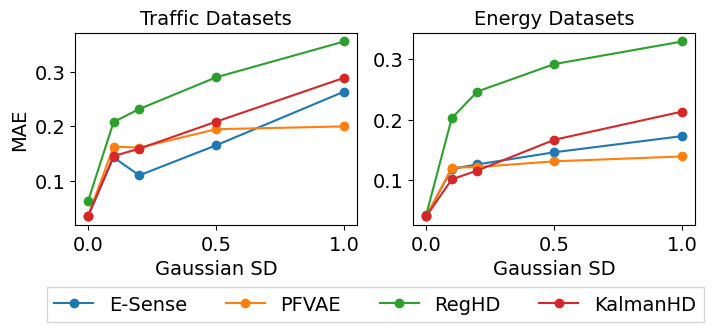

In [64]:
import matplotlib.pyplot as plt

#plt.text(x=0.5, y=0.94, s="Gaussian Noise", fontsize=20, ha="center", transform=fig.transFigure)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(2.5)

datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
#'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams'

missing_df = csv[(csv['NoiseType'] == 'Gaussian')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']

#fig = plt.figure(figsize=(4,2.5))
#ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.5, 1]

ax1.plot(labels, [i/3 for i in ac_DNN], '-o', label=r"E-Sense", color="tab:blue")
ax1.plot(labels, [i/3 for i in ac_VAE], '-o', label=r"PFVAE", color="tab:orange")
ax1.plot(labels, [i/3 for i in ac_RegHD], '-o', label=r"RegHD", color="tab:green")
#ax1.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
ax1.plot(labels, [i/3 for i in ac_ARHD], '-o', label=r"KalmanHD", color="tab:red")


#plt.legend(fontsize="7")

ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel(r'Gaussian SD', size=14)
ax1.set_ylabel('MAE', size=14)

ax1.set_title(f"Traffic Datasets", fontsize = 14)

#datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
datasets = ['EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Gaussian')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']


#ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.5, 1]

ax2.plot(labels, [i/2 for i in ac_DNN], '-o', color="tab:blue")
ax2.plot(labels, [i/2 for i in ac_VAE], '-o', color="tab:orange")
ax2.plot(labels, [i/2 for i in ac_RegHD], '-o', color="tab:green")
#ax1.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
ax2.plot(labels, [i/2 for i in ac_ARHD], '-o', color="tab:red")



#ax2.legend(fontsize="7")

ax2.xaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xlabel(r'Gaussian SD', size=14)
#ax2.set_ylabel('MAE', size=15)

#plt.ylim([0, 0.3])

ax2.set_title(f"Energy Datasets", fontsize = 14)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=False, shadow=False, ncol=5,  fontsize = 14)

plt.savefig(f"Results_Gaussian2.png", dpi=300, bbox_inches='tight')
#plt.show()

C:\Users\ivann\AppData\Local\Temp\ipykernel_14280\2601883508.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]
C:\Users\ivann\AppData\Local\Temp\ipykernel_14280\2601883508.py:97: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


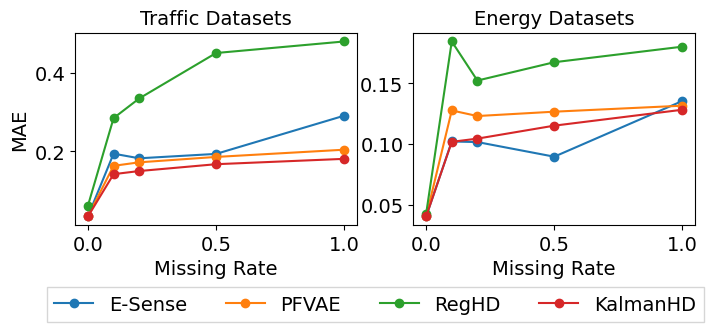

In [63]:
import matplotlib.pyplot as plt

#plt.text(x=0.5, y=0.94, s="Gaussian Noise", fontsize=20, ha="center", transform=fig.transFigure)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(2.5)

datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
#'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams'

missing_df = csv[(csv['NoiseType'] == 'Missing')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']

#fig = plt.figure(figsize=(4,2.5))
#ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.5, 1]

ax1.plot(labels, [i/3 for i in ac_DNN], '-o', label=r"E-Sense", color="tab:blue")
ax1.plot(labels, [i/3 for i in ac_VAE], '-o', label=r"PFVAE", color="tab:orange")
ax1.plot(labels, [i/3 for i in ac_RegHD], '-o', label=r"RegHD", color="tab:green")
#ax1.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
ax1.plot(labels, [i/3 for i in ac_ARHD], '-o', label=r"KalmanHD", color="tab:red")


#plt.legend(fontsize="7")

ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel(r'Missing Rate', size=14)
ax1.set_ylabel('MAE', size=14)

ax1.set_title(f"Traffic Datasets", fontsize = 14)

#datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
datasets = ['EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Missing')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']


#ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.5, 1]

ax2.plot(labels, [i/2 for i in ac_DNN], '-o', color="tab:blue")
ax2.plot(labels, [i/2 for i in ac_VAE], '-o', color="tab:orange")
ax2.plot(labels, [i/2 for i in ac_RegHD], '-o', color="tab:green")
#ax1.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
ax2.plot(labels, [i/2 for i in ac_ARHD], '-o', color="tab:red")



#ax2.legend(fontsize="7")

ax2.xaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xlabel(r'Missing Rate', size=14)
#ax2.set_ylabel('MAE', size=15)

#plt.ylim([0, 0.3])

ax2.set_title(f"Energy Datasets", fontsize = 14)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=False, shadow=False, ncol=5,  fontsize = 14)

plt.savefig(f"Results_Missing2.png", dpi=300, bbox_inches='tight')
#plt.show()

C:\Users\ivann\AppData\Local\Temp\ipykernel_14280\406443664.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(4.444444444444445, 0.5, 'MAE')

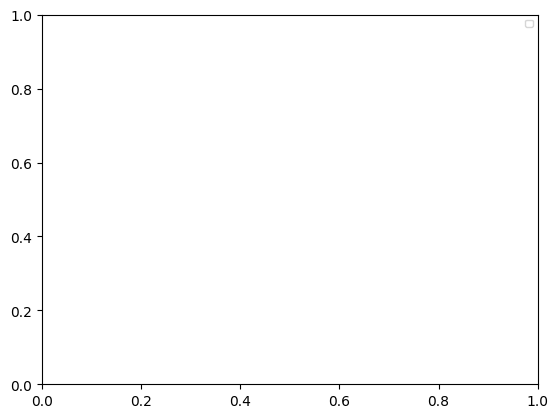

In [11]:
import matplotlib.pyplot as plt

datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
#'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams'

missing_df = csv[(csv['NoiseType'] == 'Gaussian')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']

#fig = plt.figure(figsize=(4,2.5))
#ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.5, 1]

ax1.plot(labels, [i/3 for i in ac_RegHD], 'b-o', label=r"RegHD")
ax1.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
ax1.plot(labels, [i/3 for i in ac_ARHD], 'g-o', label=r"KalmanHD")
ax1.plot(labels, [i/3 for i in ac_VAE], 'c-o', label=r"VAE")
ax1.plot(labels, [i/3 for i in ac_DNN], 'm-o', label=r"DNN")

plt.legend(fontsize="7")

ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_xlabel(r'Gaussian SD', size=15)
ax1.set_ylabel('MAE', size=15)

#ax1.ylim([0, 0.4])

#ax1.title(f"Gaussian Noise for Traffic", fontsize = 15)

#plt.savefig(f"Results_Gaussian_Traffic.png", bbox_inches="tight")
#plt.show()
#plt.clf()

In [12]:
import matplotlib.pyplot as plt

#datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
datasets = ['EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Gaussian')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']

#fig = plt.figure(figsize=(4,2.5))
#ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.5, 1]

ax2.plot(labels, [i/3 for i in ac_RegHD], 'b-o', label=r"RegHD")
ax2.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
ax2.plot(labels, [i/3 for i in ac_ARHD], 'g-o', label=r"KalmanHD")
ax2.plot(labels, [i/3 for i in ac_VAE], 'c-o', label=r"VAE")
ax2.plot(labels, [i/3 for i in ac_DNN], 'm-o', label=r"DNN")

#ax2.legend(fontsize="7")

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_xlabel(r'Gaussian SD', size=15)
ax2.set_ylabel('MAE', size=15)

#plt.ylim([0, 0.3])

#plt.title(f"Gaussian Noise for Energy", fontsize = 15)

#plt.savefig(f"Results_Gaussian_Energy.png", bbox_inches="tight")
plt.show()

C:\Users\ivann\AppData\Local\Temp\ipykernel_14280\717664278.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


C:\Users\ivann\AppData\Local\Temp\ipykernel_21092\905165631.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


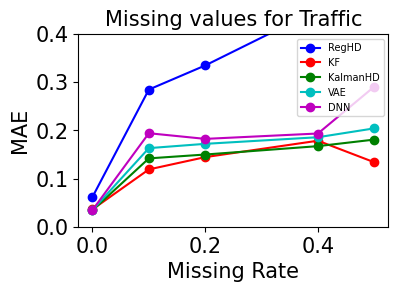

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
#datasets = ['EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Missing')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']

fig = plt.figure(figsize=(4,2.5))
ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.4, 0.5]

plt.plot(labels, [i/3 for i in ac_RegHD], 'b-o', label=r"RegHD")
plt.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
plt.plot(labels, [i/3 for i in ac_ARHD], 'g-o', label=r"KalmanHD")
plt.plot(labels, [i/3 for i in ac_VAE], 'c-o', label=r"VAE")
plt.plot(labels, [i/3 for i in ac_DNN], 'm-o', label=r"DNN")

plt.legend(fontsize="7")

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'Missing Rate', size=15)
ax.set_ylabel('MAE', size=15)

plt.ylim([0, 0.4])

plt.title(f"Missing values for Traffic", fontsize = 15)

plt.savefig(f"Results_Missing_Traffic.png", bbox_inches="tight")
plt.show()
plt.clf()

C:\Users\ivann\AppData\Local\Temp\ipykernel_21092\1353639963.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


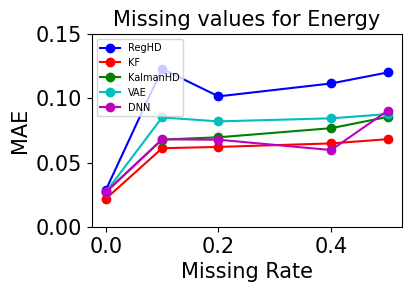

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

#datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
datasets = ['EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Missing')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']

fig = plt.figure(figsize=(4,2.5))
ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.4, 0.5]

plt.plot(labels, [i/3 for i in ac_RegHD], 'b-o', label=r"RegHD")
plt.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
plt.plot(labels, [i/3 for i in ac_ARHD], 'g-o', label=r"KalmanHD")
plt.plot(labels, [i/3 for i in ac_VAE], 'c-o', label=r"VAE")
plt.plot(labels, [i/3 for i in ac_DNN], 'm-o', label=r"DNN")

plt.legend(fontsize="7")

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'Missing Rate', size=15)
ax.set_ylabel('MAE', size=15)

plt.ylim([0, 0.15])

plt.title(f"Missing values for Energy", fontsize = 15)

plt.savefig(f"Results_Missing_Energy.png", bbox_inches="tight")
plt.show()
plt.clf()

In [ ]:
import matplotlib.pyplot as plt

#datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic']
datasets = ['EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Missing')]

ac_RegHD = [0]*5
ac_KalmanFilter = [0]*5
ac_ARHD = [0]*5
ac_VAE = [0]*5
ac_DNN = [0]*5

for dataset in datasets:

    ac_RegHD[0] = original_regHD[dataset]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)//2):
        row = RegHD.iloc[4+i]
        ac_RegHD[i+1] += row['MAE']

    ac_KalmanFilter[0] = original_KF[dataset]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter[i+1] += row['MAE']

    ac_ARHD[0] = original_ARHD[dataset]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD[i+1] += row['MAE']

    ac_VAE[0] = original_VAE[dataset]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE[i+1] += row['MAE']

    ac_DNN[0] = original_DNN[dataset]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN[i+1] += row['MAE']

fig = plt.figure(figsize=(4,2.5))
ax = fig.add_subplot(111)

labels = [0, 0.1, 0.2, 0.5, 1]

plt.plot(labels, [i/3 for i in ac_RegHD], 'b-o', label=r"RegHD")
plt.plot(labels, [i/3 for i in ac_KalmanFilter], 'r-o', label=r"KF")
plt.plot(labels, [i/3 for i in ac_ARHD], 'g-o', label=r"KalmanHD")
plt.plot(labels, [i/3 for i in ac_VAE], 'c-o', label=r"VAE")
plt.plot(labels, [i/3 for i in ac_DNN], 'm-o', label=r"DNN")

plt.legend(fontsize="7")

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'Missing Rate', size=15)
ax.set_ylabel('MAE', size=15)

plt.ylim([0, 0.4])

plt.title(f"Missing values for Traffic", fontsize = 15)

plt.savefig(f"Results_Missing_Traffic.png", bbox_inches="tight")
plt.show()
plt.clf()

C:\Users\ivann\AppData\Local\Temp\ipykernel_18440\574806925.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


      TimeSeries Dataset  Model NoiseType  NoiseVol        Lr  hd_bites  \
497  SanFranciscoTraffic  RegHD  Flipping      0.01  0.000001         4   
502  SanFranciscoTraffic  RegHD  Flipping      0.02  0.000001         4   
507  SanFranciscoTraffic  RegHD  Flipping      0.05  0.000001         4   
512  SanFranciscoTraffic  RegHD  Flipping      0.10  0.000001         4   
517  SanFranciscoTraffic  RegHD  Flipping      0.15  0.000001         4   

          MAE  
497  0.237718  
502  0.237618  
507  0.238397  
512  0.242101  
517  0.242919  
[0.2370974244600198, 0.2377183902766513, 0.2376183488262512, 0.2383973932367101, 0.2421011846090188, 0.2429193481101298]
6 6


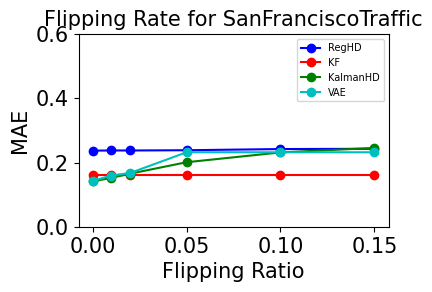

               TimeSeries Dataset  Model NoiseType  NoiseVol       Lr  \
498  MetroInterstateTrafficVolume  RegHD  Flipping      0.01  0.00001   
503  MetroInterstateTrafficVolume  RegHD  Flipping      0.02  0.00001   
508  MetroInterstateTrafficVolume  RegHD  Flipping      0.05  0.00001   
513  MetroInterstateTrafficVolume  RegHD  Flipping      0.10  0.00001   
518  MetroInterstateTrafficVolume  RegHD  Flipping      0.15  0.00001   

     hd_bites       MAE  
498         2  0.166173  
503         2  0.168319  
508         2  0.172014  
513         2  0.191493  
518         2  0.200284  
[0.1555402489497904, 0.166173271903861, 0.1683191765531065, 0.1720135247502631, 0.1914932035403037, 0.2002841852507337]
6 6


C:\Users\ivann\AppData\Local\Temp\ipykernel_18440\574806925.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


<Figure size 640x480 with 0 Axes>

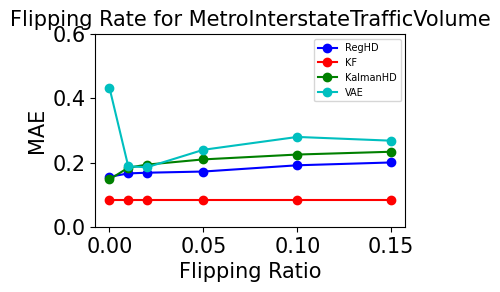

    TimeSeries Dataset  Model NoiseType  NoiseVol        Lr  hd_bites  \
499   GuangzhouTraffic  RegHD  Flipping      0.01  0.000001         4   
504   GuangzhouTraffic  RegHD  Flipping      0.02  0.000001         4   
509   GuangzhouTraffic  RegHD  Flipping      0.05  0.000001         4   
514   GuangzhouTraffic  RegHD  Flipping      0.10  0.000001         4   
519   GuangzhouTraffic  RegHD  Flipping      0.15  0.000001         4   

          MAE  
499  0.192034  
504  0.192669  
509  0.195760  
514  0.210468  
519  0.208765  
[0.1856148422214156, 0.1920338088567529, 0.1926685457337357, 0.1957595727685267, 0.2104683736552158, 0.2087645484663364]
6 6


C:\Users\ivann\AppData\Local\Temp\ipykernel_18440\574806925.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


<Figure size 640x480 with 0 Axes>

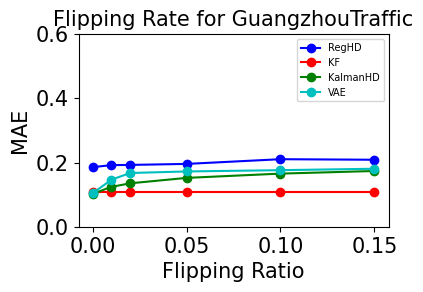

              TimeSeries Dataset  Model NoiseType  NoiseVol        Lr  \
500  EnergyConsumptionFraunhofer  RegHD  Flipping      0.01  0.000001   
505  EnergyConsumptionFraunhofer  RegHD  Flipping      0.02  0.000001   
510  EnergyConsumptionFraunhofer  RegHD  Flipping      0.05  0.000001   
515  EnergyConsumptionFraunhofer  RegHD  Flipping      0.10  0.000001   
520  EnergyConsumptionFraunhofer  RegHD  Flipping      0.15  0.000001   

     hd_bites       MAE  
500         4  0.283052  
505         4  0.284940  
510         4  0.287294  
515         4  0.290552  
520         4  0.292731  
[0.2808919416929978, 0.2830520266433722, 0.2849398744931287, 0.287294104616317, 0.2905519835447614, 0.2927311142400092]
6 6


C:\Users\ivann\AppData\Local\Temp\ipykernel_18440\574806925.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


<Figure size 640x480 with 0 Axes>

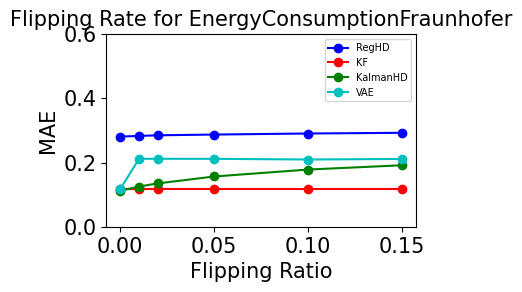

          TimeSeries Dataset  Model NoiseType  NoiseVol       Lr  hd_bites  \
501  ElectricityLoadDiagrams  RegHD  Flipping      0.01  0.00001         1   
506  ElectricityLoadDiagrams  RegHD  Flipping      0.02  0.00001         1   
511  ElectricityLoadDiagrams  RegHD  Flipping      0.05  0.00001         1   
516  ElectricityLoadDiagrams  RegHD  Flipping      0.10  0.00001         1   
521  ElectricityLoadDiagrams  RegHD  Flipping      0.15  0.00001         1   

          MAE  
501  0.085138  
506  0.084497  
511  0.088468  
516  0.091962  
521  0.095620  
[0.085257148141733, 0.0851375754323275, 0.0844973955566547, 0.0884678912624759, 0.0919622636066715, 0.0956203710479768]
6 6


C:\Users\ivann\AppData\Local\Temp\ipykernel_18440\574806925.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]


<Figure size 640x480 with 0 Axes>

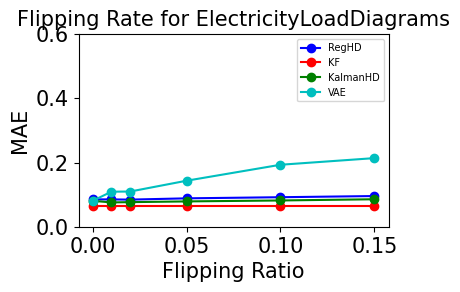

<Figure size 640x480 with 0 Axes>

In [38]:
# Flipping bits plots

import matplotlib.pyplot as plt

datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Flipping')]

for dataset in datasets:

    ac_RegHD = [original_regHD[dataset]]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (csv['NoiseVol'] != 0) & (missing_df['TimeSeries Dataset'] == dataset)]

    print(RegHD)
    
    for i in range(len(RegHD)):
        row = RegHD.iloc[i]
        ac_RegHD.append(row['MAE'])

    print(ac_RegHD)

    ac_KalmanFilter = [original_KF[dataset]]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter.append(row['MAE'])

    ac_ARHD = [original_ARHD[dataset]]

    ARHD = missing_df[(missing_df['Model'] == 'KalmanHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD.append(row['MAE'])

    ac_VAE = [original_VAE[dataset]]

    VAE = missing_df[(missing_df['Model'] == 'VAE') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(VAE)):
        row = VAE.iloc[i]
        ac_VAE.append(row['MAE'])

    ac_DNN = [original_DNN[dataset]]

    DNN = missing_df[(missing_df['Model'] == 'DNN') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(DNN)):
        row = DNN.iloc[i]
        ac_DNN.append(row['MAE'])

    fig = plt.figure(figsize=(4,2.5))
    ax = fig.add_subplot(111)

    labels = [0, 0.01, 0.02, 0.05, 0.10, 0.15]

    plt.plot(labels, ac_RegHD, 'b-o', label=r"RegHD")
    plt.plot(labels, ac_KalmanFilter, 'r-o', label=r"KF")
    print(len(labels), len(ac_ARHD))
    plt.plot(labels, ac_ARHD, 'g-o', label=r"KalmanHD")
    plt.plot(labels, ac_VAE, 'c-o', label=r"VAE")
    #plt.plot(labels, ac_DNN, 'm-o', label=r"DNN")

    plt.legend(fontsize="7")

    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_xlabel(r'Flipping Ratio', size=15)
    ax.set_ylabel('MAE', size=15)

    plt.ylim([0, 0.6])

    plt.title(f"Flipping Rate for {dataset}", fontsize = 15)

    plt.savefig(f"Results_Flipping_{dataset}.png", bbox_inches="tight")
    plt.show()
    plt.clf()


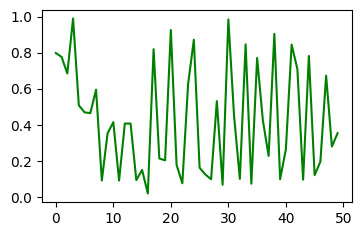

<Figure size 640x480 with 0 Axes>

In [10]:
# Random TS image

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(4,2.5))
ax = fig.add_subplot(111)

x = [i for i in range(50)]
y = [np.random.rand() for _ in range(50)]

plt.plot(x, y, 'g-')

plt.savefig(f"Example3.png", bbox_inches="tight")

plt.show()
plt.clf()

In [6]:
import pandas as pd

csv = pd.read_csv('results_Models.csv')
original = csv[(csv['Model'] == 'KalmanHD') & (csv['TimeSeries Dataset'] == 'ElectricityLoadDiagrams')]
print(len(original))
original

12


,TimeSeries Dataset,Model,Models,Novelty,Lr,hd_bites,MAE
4,ElectricityLoadDiagrams,KalmanHD,2,0.05,0.01,1,0.084373
9,ElectricityLoadDiagrams,KalmanHD,2,0.07,0.01,1,0.084528
26,ElectricityLoadDiagrams,KalmanHD,2,0.30,0.01,1,0.082953
31,ElectricityLoadDiagrams,KalmanHD,2,0.50,0.01,1,0.082027
36,ElectricityLoadDiagrams,KalmanHD,2,0.70,0.01,1,0.082012
41,ElectricityLoadDiagrams,KalmanHD,8,0.30,0.01,1,0.090586
46,ElectricityLoadDiagrams,KalmanHD,8,0.50,0.01,1,0.098197
51,ElectricityLoadDiagrams,KalmanHD,8,0.70,0.01,1,0.120761
56,ElectricityLoadDiagrams,KalmanHD,32,0.30,0.01,1,0.393611
61,ElectricityLoadDiagrams,KalmanHD,32,0.50,0.01,1,0.366496
